# SC21x
 
## 선형모델 (Linear Models)

In [1]:
# Google Colab에서 하시는 경우 해당 셀을 먼저 실행해주시기 바랍니다.
import sys
if 'google.colab' in sys.modules:
    !pip install category_encoders==2.*
    !pip install pandas-profiling==2.*
    !pip install plotly==4.*

# Part 1 - 분류 (Classification): 헌혈 여부 예측하기 🚑
Part 1에선 대만의 이동식 헌혈 차량 헌혈자들의 정보를 담은 데이터셋을 다룹니다. 대만의 수혈 서비스 센터 (The Blood Transfusion Service Center)는 이동식 차량으로 대학교들을 돌면서 헌혈 행사를 진행, 수혈을 위한 혈액을 기부 받습니다.

Part 1의 목표는 각 헌혈자의 정보를 활용해서 **헌혈자가 2007년 3월에 헌혈을 했는지 여부**를 예측하는 것입니다. 

헌혈 여부 및 공급 요구를 추적하고 예측하는 좋은 데이터 기반 시스템은 공급망 전체를 개선하여 더 많은 환자가 필요한 수혈을 받도록 할 수 있습니다.

In [2]:
# 분석에 필요한 라이브러리 및 데이터셋을 불러옵니다
import pandas as pd

donors = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data')
assert donors.shape == (748,5)  # 데이터셋이 잘 불러와졌는지 assert를 사용해 검증합니다.

# 칼럼의 이름을 이해하기 쉽도록 변경합니다.
donors = donors.rename(columns={
    'Recency (months)': 'months_since_last_donation', 
    'Frequency (times)': 'number_of_donations', 
    'Monetary (c.c. blood)': 'total_volume_donated', 
    'Time (months)': 'months_since_first_donation', 
    'whether he/she donated blood in March 2007': 'made_donation_in_march_2007'
})

In [3]:
donors.head()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


## 칼럼 설명:
- **months_since_last_donation**: 마지막으로 헌혈을 한 후에 지난 개월수
- **number_of_donations**: 헌혈 횟수
- **total_volume_donated**: 기부한 혈액 총량
- **months_since_first_donation**: 첫 헌혈을 한 후에 지난 개월수
- **made_donation_in_march_2007**: 2007년 헌혈을 했는지 여부 (target)

데이터를 본다면 약 3/4에 해당하는 과반수가 2007년 3월에 헌혈을 하지 않았다는 것을 알 수 있습니다.  
아래는 Baseline 모델의 정확도 점수 (accuracy score)를 나타낸 것입니다.

In [4]:
donors['made_donation_in_march_2007'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: made_donation_in_march_2007, dtype: float64

## 1.1 데이터를 feature (X), label(y)로 분할하고 데이터를 train/test 셋으로 무작위로 나누어 주세요 (scikit-learn 활용).

In [5]:
# 이 곳에 답안을 작성하십시오
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [6]:
donors.describe()

,months_since_last_donation,number_of_donations,total_volume_donated,months_since_first_donation,made_donation_in_march_2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [7]:
from sklearn.model_selection import train_test_split

target = 'made_donation_in_march_2007'

X_train, X_test = train_test_split(donors, test_size = 0.2, random_state = 2)

y_train = X_train[target]
y_test = X_test[target]

X_train.drop(['made_donation_in_march_2007'], axis = 1, inplace=True)
X_test.drop(['made_donation_in_march_2007'], axis = 1, inplace=True)

## 1.2 scikit-learn으로 logistic regression 모델을 만든 후에 학습 (fit)까지 진행하세요. 

학습에 사용할 feature 수는 자유롭게 결정 하십시오. 

In [8]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [9]:
# 이 곳에 답안을 작성하십시오
from sklearn.linear_model import LogisticRegression

logistic = LogisticRegression(max_iter=1000)
logistic.fit(X_train_scaled, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 1.3 분류 평가 지표 (classification metric) 보고: 정확도 (accuracy)
테스트셋을 사용했을 때 분류 모델의 정확도(accuracy score)를 알려주세요.

모델의 성능이 베이스라인보다 안좋더라도 걱정하지 마세요. 
(accuracy 대신 recall을 평가 지표 (metric)로 사용할 경우에 우리가 만든 모델이 베이스라인을 뛰어넘을 수 있습니다. 알맞은 평가 지표를 고르고 해석하는 법은 앞으로 계속 다룰 예정입니다.)

In [10]:
# 이 곳에 답안을 작성하십시오
from sklearn.metrics import accuracy_score

print('테스트세트 정확도', logistic.score(X_test_scaled, y_test))

테스트세트 정확도 0.76


# Part 2 - 회귀(Regression): Iowa 주 Ames의 집값 예측하기 🏠

여러분이 다루게 될 데이터는 Iowa 주에 있는 Ames시의 주택들의 정보를 모은 데이터셋입니다.

## 칼럼 설명
```
1stFlrSF: 1층 면적 (square feet)

BedroomAbvGr: 지하실 제외 침실 갯수

BldgType: 주거 형태
		
       1Fam	Single-family Detached	
       2FmCon	Two-family Conversion; originally built as one-family dwelling
       Duplx	Duplex
       TwnhsE	Townhouse End Unit
       TwnhsI	Townhouse Inside Unit
       
BsmtHalfBath: 지하실 half-bathroom 개수 (세면대와 변기만 있는 화장실)

BsmtFullBath: 지하실 full bathroom 개수 (세면대, 변기, 샤워, 욕조 전부 있는 욕실)

CentralAir: 중앙 냉방 장치 유무

       N	No
       Y	Yes
		
Condition1: 다양한 조건과의 근접성
	
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
	
Condition2: 다양한 조건과의 근접성 (하나 이상 존재할 시)
		
       Artery	Adjacent to arterial street
       Feedr	Adjacent to feeder street	
       Norm	Normal	
       RRNn	Within 200' of North-South Railroad
       RRAn	Adjacent to North-South Railroad
       PosN	Near positive off-site feature--park, greenbelt, etc.
       PosA	Adjacent to postive off-site feature
       RRNe	Within 200' of East-West Railroad
       RRAe	Adjacent to East-West Railroad
       
Electrical: 전기 시스템

       SBrkr	Standard Circuit Breakers & Romex
       FuseA	Fuse Box over 60 AMP and all Romex wiring (Average)	
       FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair)
       FuseP	60 AMP Fuse Box and mostly knob & tube wiring (poor)
       Mix	Mixed
       
ExterCond: 외관 소재 현황 평가
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
 
ExterQual: 외관 소재 품질 평가
		
       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor
		
Exterior1st: 집 외부 소재

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast	
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
	
Exterior2nd: 집 외부 소재 (하나 이상 존재할 시)

       AsbShng	Asbestos Shingles
       AsphShn	Asphalt Shingles
       BrkComm	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       CemntBd	Cement Board
       HdBoard	Hard Board
       ImStucc	Imitation Stucco
       MetalSd	Metal Siding
       Other	Other
       Plywood	Plywood
       PreCast	PreCast
       Stone	Stone
       Stucco	Stucco
       VinylSd	Vinyl Siding
       Wd Sdng	Wood Siding
       WdShing	Wood Shingles
       
Foundation: 주택의 토대 종류
		
       BrkTil	Brick & Tile
       CBlock	Cinder Block
       PConc	Poured Concrete	
       Slab	Slab
       Stone	Stone
       Wood	Wood
		
FullBath: 지상층의 full-bathroom 갯수

Functional: 주택의 기능성 (공제가 보장되지 않는 한 일반적인 것으로 가정)

       Typ	Typical Functionality
       Min1	Minor Deductions 1
       Min2	Minor Deductions 2
       Mod	Moderate Deductions
       Maj1	Major Deductions 1
       Maj2	Major Deductions 2
       Sev	Severely Damaged
       Sal	Salvage only
		
GrLivArea: 지상 주거지역 면적 (sqaure feet)
        
HalfBath: 지상층 half-bathroom 갯수

Heating: 난방 종류
		
       Floor	Floor Furnace
       GasA	Gas forced warm air furnace
       GasW	Gas hot water or steam heat
       Grav	Gravity furnace	
       OthW	Hot water or steam heat other than gas
       Wall	Wall furnace
		
HeatingQC: 난방 품질 및 상태

       Ex	Excellent
       Gd	Good
       TA	Average/Typical
       Fa	Fair
       Po	Poor

HouseStyle: 주거 형식
	
       1Story	One story
       1.5Fin	One and one-half story: 2nd level finished
       1.5Unf	One and one-half story: 2nd level unfinished
       2Story	Two story
       2.5Fin	Two and one-half story: 2nd level finished
       2.5Unf	Two and one-half story: 2nd level unfinished
       SFoyer	Split Foyer
       SLvl	Split Level

KitchenAbvGr: 지상층 주방 갯수

KitchenQual: 주방 품질

       Ex	Excellent
       Gd	Good
       TA	Typical/Average
       Fa	Fair
       Po	Poor

LandContour: 소유지의 평탄도

       Lvl	Near Flat/Level	
       Bnk	Banked - Quick and significant rise from street grade to building
       HLS	Hillside - Significant slope from side to side
       Low	Depression
		
LandSlope: 소유지 경사도
		
       Gtl	Gentle slope
       Mod	Moderate Slope	
       Sev	Severe Slope

LotArea: 용지 크기 (square feet)

LotConfig: 용지 구성

       Inside	Inside lot
       Corner	Corner lot
       CulDSac	Cul-de-sac
       FR2	Frontage on 2 sides of property
       FR3	Frontage on 3 sides of property

LotShape: 소유지의 형태
       Reg	Regular	
       IR1	Slightly irregular
       IR2	Moderately Irregular
       IR3	Irregular

MSSubClass: 분양되는 주거지의 유형	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: 주택이 속해있는 구역 구분
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM	Residential Medium Density

MasVnrType: 석조 베니어 유형

       BrkCmn	Brick Common
       BrkFace	Brick Face
       CBlock	Cinder Block
       None	None
       Stone	Stone

MoSold: 팔린 달  

Neighborhood: Ames시의 경계내 물리적 위치

       Blmngtn	Bloomington Heights
       Blueste	Bluestem
       BrDale	Briardale
       BrkSide	Brookside
       ClearCr	Clear Creek
       CollgCr	College Creek
       Crawfor	Crawford
       Edwards	Edwards
       Gilbert	Gilbert
       IDOTRR	Iowa DOT and Rail Road
       MeadowV	Meadow Village
       Mitchel	Mitchell
       Names	North Ames
       NoRidge	Northridge
       NPkVill	Northpark Villa
       NridgHt	Northridge Heights
       NWAmes	Northwest Ames
       OldTown	Old Town
       SWISU	South & West of Iowa State University
       Sawyer	Sawyer
       SawyerW	Sawyer West
       Somerst	Somerset
       StoneBr	Stone Brook
       Timber	Timberland
       Veenker	Veenker
			
OverallCond: 주택의 전반적인 상태 평가

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor

OverallQual: 주택의 전체 자재와 마감재에 대한 평가

       10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

PavedDrive: 포장 진입로

       Y	Paved 
       P	Partial Pavement
       N	Dirt/Gravel

RoofMatl: 지붕 소재

       ClyTile	Clay or Tile
       CompShg	Standard (Composite) Shingle
       Membran	Membrane
       Metal	Metal
       Roll	Roll
       Tar&Grv	Gravel & Tar
       WdShake	Wood Shakes
       WdShngl	Wood Shingles

RoofStyle: 지붕 형태

       Flat	Flat
       Gable	Gable
       Gambrel	Gabrel (Barn)
       Hip	Hip
       Mansard	Mansard
       Shed	Shed

SalePrice: 주택의 판매 가격

SaleCondition: 판매 조건

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)

SaleType: 판매 유형
		
       WD 	Warranty Deed - Conventional
       CWD	Warranty Deed - Cash
       VWD	Warranty Deed - VA Loan
       New	Home just constructed and sold
       COD	Court Officer Deed/Estate
       Con	Contract 15% Down payment regular terms
       ConLw	Contract Low Down payment and low interest
       ConLI	Contract Low Interest
       ConLD	Contract Low Down
       Oth	Other
	
Street: 소유지에 대한 도로 접근 유형

       Grvl	Gravel	
       Pave	Paved
       	
TotRmsAbvGrd: 지상층 방 갯수 (화장실/욕실 제외)

Utilities: 수도세, 전기세, 가스세 포함 여부
		
       AllPub	All public Utilities (E,G,W,& S)	
       NoSewr	Electricity, Gas, and Water (Septic Tank)
       NoSeWa	Electricity and Gas Only
       ELO	Electricity only	
	
YearBuilt: 건축 연도

YearRemod/Add: 리모델링 / 추가 공사 연도 (아무런 리모델링이나 추가 시공이 없는 경우 건축연도와 동일)
						
YrSold: 판매 연도 (YYYY)	

```

In [11]:
# 데이터셋을 불러옵니다
import pandas as pd
homes = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/ames_home/ames_home_subset.csv')
assert homes.shape == (2904, 47)

In [12]:
homes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2904 entries, 0 to 2903
Data columns (total 47 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       2904 non-null   int64  
 1   BedroomAbvGr   2904 non-null   int64  
 2   BldgType       2904 non-null   object 
 3   BsmtFullBath   2904 non-null   float64
 4   BsmtHalfBath   2904 non-null   float64
 5   CentralAir     2904 non-null   object 
 6   Condition1     2904 non-null   object 
 7   Condition2     2904 non-null   object 
 8   Electrical     2904 non-null   object 
 9   ExterCond      2904 non-null   object 
 10  ExterQual      2904 non-null   object 
 11  Exterior1st    2904 non-null   object 
 12  Exterior2nd    2904 non-null   object 
 13  Foundation     2904 non-null   object 
 14  FullBath       2904 non-null   int64  
 15  Functional     2904 non-null   object 
 16  GrLivArea      2904 non-null   int64  
 17  HalfBath       2904 non-null   int64  
 18  Heating 

In [13]:
homes.describe()

,1stFlrSF,BedroomAbvGr,BsmtFullBath,BsmtHalfBath,FullBath,GrLivArea,HalfBath,KitchenAbvGr,LotArea,MSSubClass,MoSold,OverallCond,OverallQual,SalePrice,TotRmsAbvGrd,YearBuilt,YearRemod/Add,YrSold
count,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000,2904.000000
mean,1158.257231,2.854339,0.431474,0.061639,1.562328,1497.853650,0.376722,1.044421,10130.199725,57.474174,6.206956,5.567149,6.086777,180383.689738,6.441804,1971.109504,1984.112259,2007.792011
std,388.351648,0.827820,0.525073,0.246202,0.551427,504.591527,0.501416,0.214260,7869.928702,42.724950,2.712204,1.113736,1.410083,79802.823684,1.573130,30.227141,20.857813,1.318719
min,334.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,1300.000000,20.000000,1.000000,1.000000,1.000000,12789.000000,2.000000,1872.000000,1950.000000,2006.000000
25%,876.750000,2.000000,0.000000,0.000000,1.000000,1124.000000,0.000000,1.000000,7424.750000,20.000000,4.000000,5.000000,5.000000,129150.000000,5.000000,1953.000000,1965.000000,2007.000000
50%,1083.500000,3.000000,0.000000,0.000000,2.000000,1440.500000,0.000000,1.000000,9429.000000,50.000000,6.000000,5.000000,6.000000,160000.000000,6.000000,1973.000000,1993.000000,2008.000000
75%,1383.000000,3.000000,1.000000,0.000000,2.000000,1740.500000,1.000000,1.000000,11516.250000,70.000000,8.000000,6.000000,7.000000,213000.000000,7.000000,2000.000000,2004.000000,2009.000000
max,5095.000000,8.000000,3.000000,2.000000,4.000000,5642.000000,2.000000,3.000000,215245.000000,190.000000,12.000000,9.000000,10.000000,755000.000000,15.000000,2010.000000,2010.000000,2010.000000


## 2.1 Baseline 평가지표를 계산하세요

평균 baseline의 $MAE$ (Mean Absolute Error)와 $R^2$ 점수를 계산하세요 (계산을 하는 방법은 데이터를 나누지 않은 채로 계산하면 됩니다.) 

In [14]:
# 이 곳에 답안을 작성하십시오
target = 'SalePrice'

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

predict = homes[target].mean()

predict

180383.689738292

In [15]:
y_pred = [predict] * len(homes)
mae = mean_absolute_error(homes[target], y_pred)

print(f'기준모델 에러: {mae:.2f}')

print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(homes[target], y_pred)))

기준모델 에러: 58149.93

r2 Variance score  0.000



## 2.2 데이터셋을 아래의 기준을 사용해서 train/validation/test 셋으로 나누세요

- **Train**: 2006년부터 2008년까지 팔린 주택들 (1,920개)

- **Validation**: 2009년에 팔린 주택들. (644개)

- **Test**: 2010년에 팔린 주택들. (340개)

In [16]:
# 이 곳에 답안을 작성하십시오
train = homes[(homes['YrSold'] >= 2006) & (homes['YrSold'] <= 2008)]
validation = homes[homes['YrSold'] == 2009]
test = homes[homes['YrSold'] >= 2010]

In [17]:
print(train.shape)
print(validation.shape)
print(test.shape)

(1920, 47)
(644, 47)
(340, 47)


## 2.3 train / validation / test 셋을 features(X)와 target(y)으로 각각 나누세요

특성에는 최소 하나의 수치형 (numeric) 특성과 범주형 (categorical) 특성을 포함하세요.  
위의 조건을 만족한다면 추가 feature를 선택하는 것에 대한 제한은 없습니다.

In [18]:
# 이 곳에 답안을 작성하십시오

target = ['SalePrice']

features = ['GrLivArea','BldgType', 'TotRmsAbvGrd', 'Utilities' ]

X_train = train[features]
X_val = validation[features]
X_test = test[features]

y_train = train[target]
y_val = validation[target]
y_test = test[target]

In [19]:
X_train.head()

,GrLivArea,BldgType,TotRmsAbvGrd,Utilities
984,1414,1Fam,6,AllPub
985,2117,1Fam,7,AllPub
986,2112,1Fam,9,AllPub
987,1604,1Fam,7,AllPub
988,1470,1Fam,7,AllPub


## 2.4 One-hot encoding을 카테고리형 특성(feature)에 수행하세요

In [20]:
# 이 곳에 답안을 작성하십시오
!pip install category_encoders
from category_encoders import OneHotEncoder

In [21]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.head(3)

,GrLivArea,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon,TotRmsAbvGrd,Utilities_AllPub,Utilities_NoSewr
984,1414,1,0,0,0,0,6,1,0
985,2117,1,0,0,0,0,7,1,0
986,2112,1,0,0,0,0,9,1,0


## 2.5 scikit-learn으로 linear regression이나 ridge regression 모델을 만들어서 학습하세요

In [22]:
# 이 곳에 답안을 작성하십시오
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_encoded, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## 2.6 Validation 데이터셋의 MAE and $R^2$
validation 데이터셋에 모델을 예측했을 때의 MAE와 $R^2$ 점수를 계산하세요. (검증 점수의 높고 낮음은 채점에 영향을 미치지 않습니다)

In [23]:
# 이 곳에 답안을 작성하십시오
y_pred = model.predict(X_val_encoded)
mae = mean_absolute_error(y_val, y_pred)
print(f'검증 MAE 에러: {mae:.3f}')
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_val, y_pred)))

검증 MAE 에러: 39326.007

r2 Variance score  0.513



# Advanced Goals: 3점을 획득하기 위해선 아래의 모든 조건을 만족해야합니다. 
### Part 2의 데이터셋을 활용하여 아래의 과제들을 수행하세요.
- 다양한 시각화 라이브러리를 활용하여 feature와 target의 관계를 보여주는 시각화를 최소 2개 이상 하세요. 
- 새로운 feature 조합을 최소 3개 이상 만드세요. feature의 조합을 구성하는 방법에는 어떠한 제한도 없습니다.
- 위에서 만든 각 feature 조합에 대한 validation set의 MAE 와 $R^2$를 계산하세요.
- 최종 모델을 정한 후 test set의 MAE 와 $R^2$을 계산하세요.
- 최종 모델에서 사용한 특성들의 회귀 계수 (coefficients)를 출력하거나 시각화 하세요.

# 이 곳에 답안을 작성하십시오

# 시각화

In [24]:
import pandas as pd
homes = pd.read_csv('https://ds-lecture-data.s3.ap-northeast-2.amazonaws.com/ames_home/ames_home_subset.csv')
assert homes.shape == (2904, 47)

train = homes[(homes['YrSold'] >= 2006) & (homes['YrSold'] <= 2008)]
validation = homes[homes['YrSold'] == 2009]
test = homes[homes['YrSold'] >= 2010]

target = ['SalePrice']

y_train = train[target]
y_val = validation[target]
y_test = test[target]

X_train = train.drop(['SalePrice'], axis = 1)
X_val = validation.drop(['SalePrice'], axis = 1)
X_test = test.drop(['SalePrice'], axis = 1)


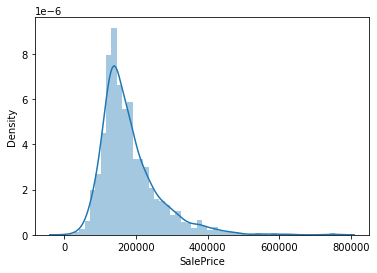

In [25]:
sns.distplot(y_train['SalePrice']);

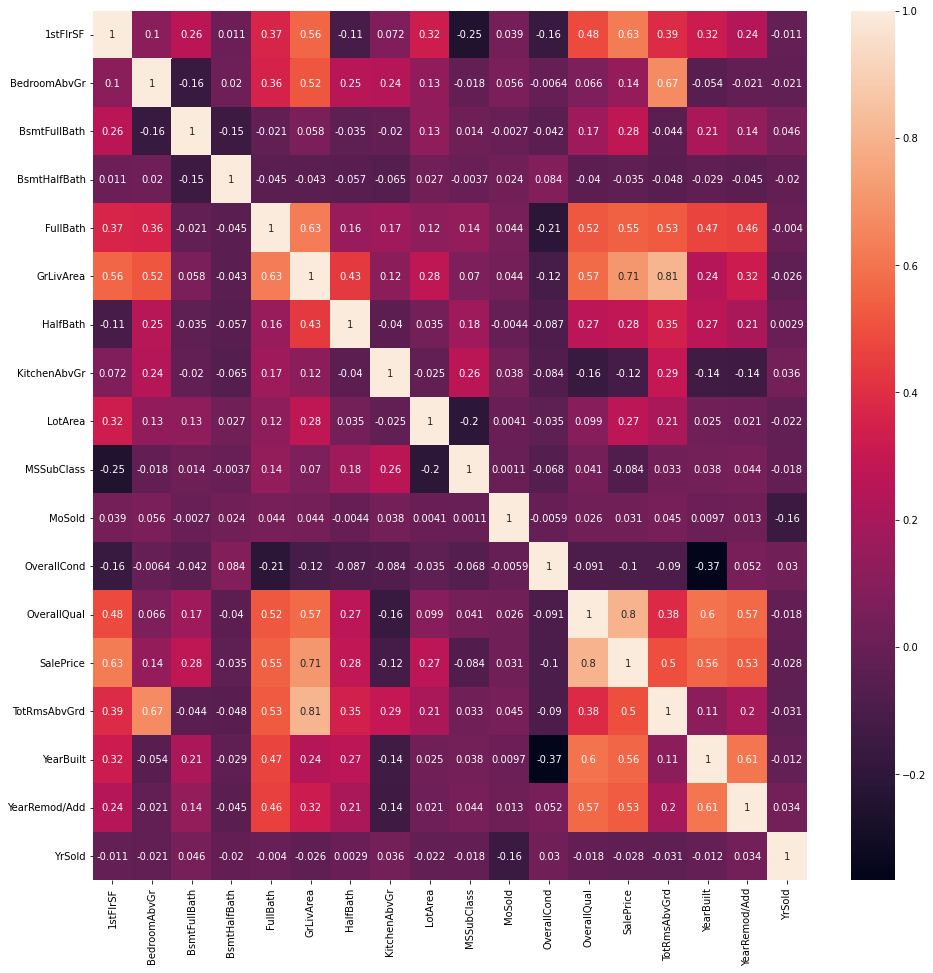

In [26]:
plt.figure(figsize=(16,16))
sns.heatmap(homes.corr(), annot = True);

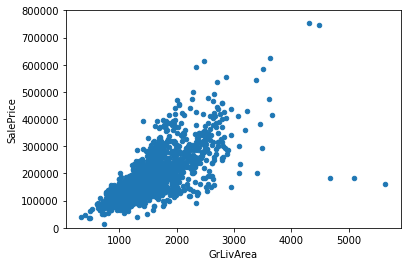

In [27]:
var = 'GrLivArea'
data = pd.concat([y_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

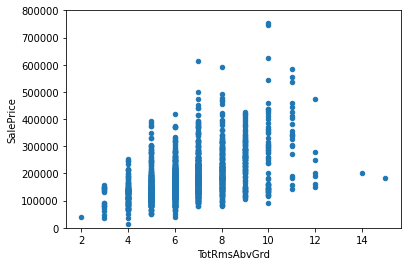

In [28]:
var = 'TotRmsAbvGrd'
data = pd.concat([y_train['SalePrice'], X_train[var]], axis=1)
data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

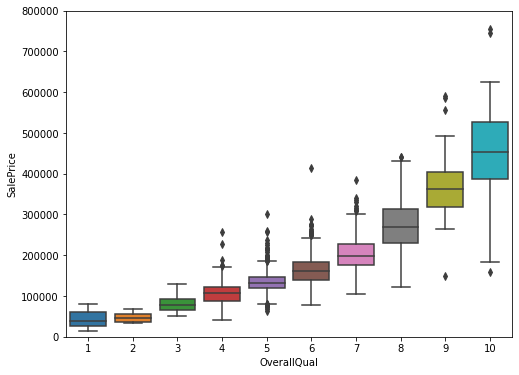

In [29]:
var = 'OverallQual'
data = pd.concat([y_train['SalePrice'], X_train[var]], axis=1)
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);

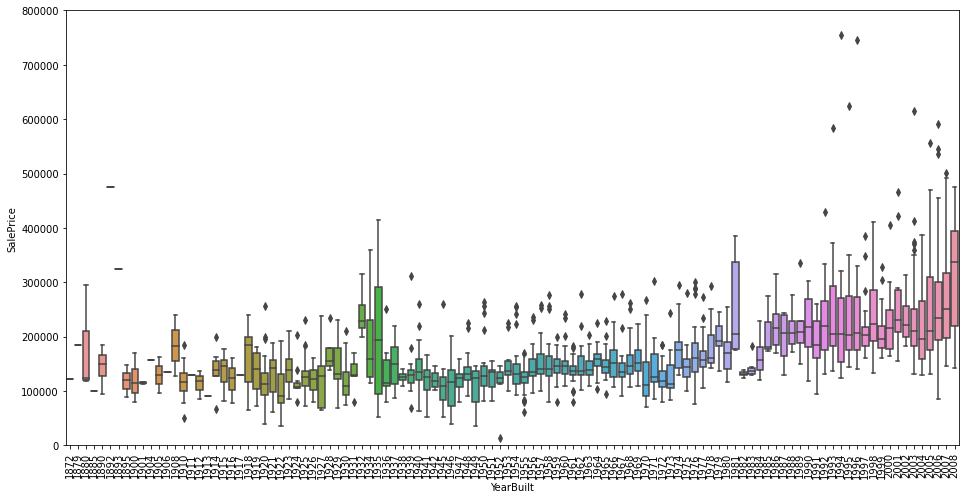

In [30]:
var = 'YearBuilt'
data = pd.concat([y_train['SalePrice'], X_train[var]], axis=1)
f, ax = plt.subplots(figsize=(16, 8))
fig = sns.boxplot(x=var, y="SalePrice", data=data)
fig.axis(ymin=0, ymax=800000);
plt.xticks(rotation=90);

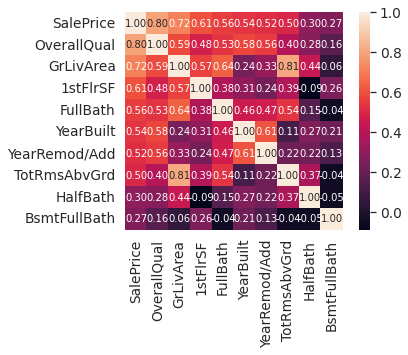

In [31]:
corrmat = train.corr()

k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

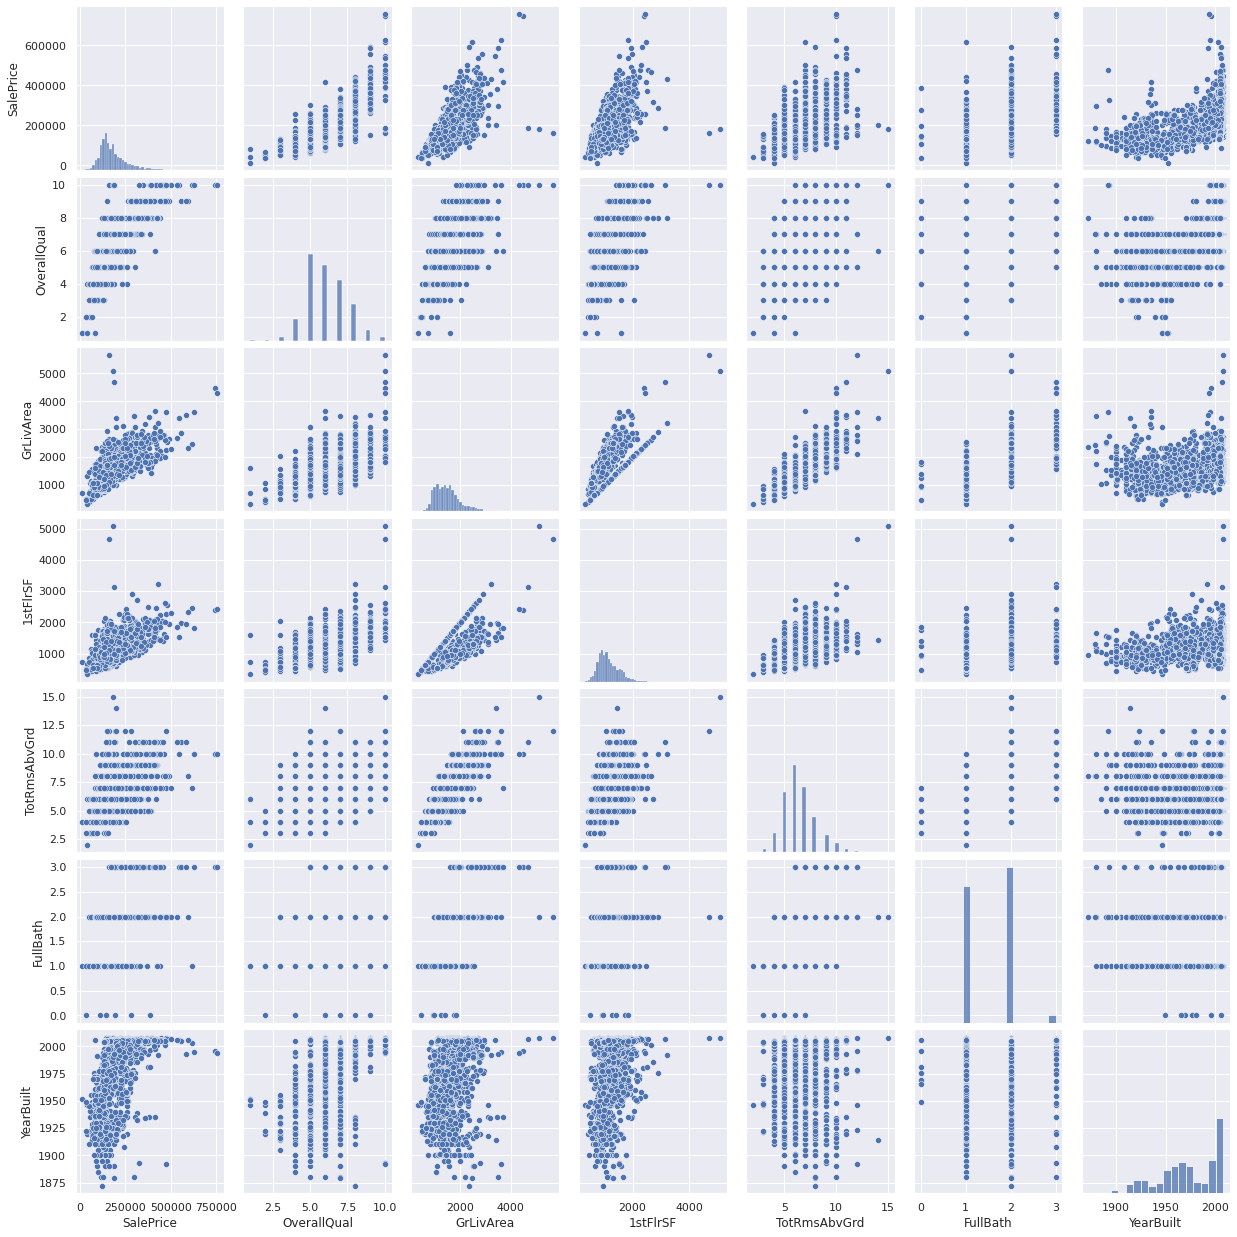

In [32]:
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'FullBath', 'YearBuilt']
sns.pairplot(train[cols], size = 2.5)
plt.show();

# 추가 피쳐 생성

In [33]:
# 1 - 재건축을 했을 경우 건축연도를 갱신하여 year라는 새로운 피쳐 생성

homes['year'] = 0

for i in range(len(homes)):
  if homes['YearRemod/Add'][i] == homes['YearBuilt'][i]:
    homes['year'][i] = homes['YearBuilt'][i]
  else:
    homes['year'][i] = homes['YearRemod/Add'][i]

In [34]:
# 2 - 지상 half 화장실, full 화장실 갯수를 합한 TotBath 생성

homes['TotBath'] = homes['HalfBath'] + homes['FullBath']

In [35]:
# 3 - 지하 half 화장실, full 화장실 갯수를 합한 TotBsmtBath 생성

homes['TotBsmtBath'] = homes['BsmtHalfBath'] + homes['BsmtFullBath']

In [36]:
homes.head()

,1stFlrSF,BedroomAbvGr,BldgType,BsmtFullBath,BsmtHalfBath,CentralAir,Condition1,Condition2,Electrical,ExterCond,ExterQual,Exterior1st,Exterior2nd,Foundation,FullBath,Functional,GrLivArea,HalfBath,Heating,HeatingQC,HouseStyle,KitchenAbvGr,KitchenQual,LandContour,LandSlope,LotArea,LotConfig,LotShape,MSSubClass,MSZoning,MasVnrType,MoSold,Neighborhood,OverallCond,OverallQual,PavedDrive,RoofMatl,RoofStyle,SalePrice,SaleCondition,SaleType,Street,TotRmsAbvGrd,Utilities,YearBuilt,YearRemod/Add,YrSold,year,TotBath,TotBsmtBath
0,1656,3,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,BrkFace,Plywood,CBlock,1,Typ,1656,0,GasA,Fa,1Story,1,TA,Lvl,Gtl,31770,Corner,IR1,20,RL,Stone,5,NAmes,5,6,P,CompShg,Hip,215000,Normal,WD,Pave,7,AllPub,1960,1960,2010,1960,1,1.0
1,896,2,1Fam,0.0,0.0,Y,Feedr,Norm,SBrkr,TA,TA,VinylSd,VinylSd,CBlock,1,Typ,896,0,GasA,TA,1Story,1,TA,Lvl,Gtl,11622,Inside,Reg,20,RH,None,6,NAmes,6,5,Y,CompShg,Gable,105000,Normal,WD,Pave,5,AllPub,1961,1961,2010,1961,1,0.0
2,1329,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,Wd Sdng,Wd Sdng,CBlock,1,Typ,1329,1,GasA,TA,1Story,1,Gd,Lvl,Gtl,14267,Corner,IR1,20,RL,BrkFace,6,NAmes,6,6,Y,CompShg,Hip,172000,Normal,WD,Pave,6,AllPub,1958,1958,2010,1958,2,0.0
3,2110,3,1Fam,1.0,0.0,Y,Norm,Norm,SBrkr,TA,Gd,BrkFace,BrkFace,CBlock,2,Typ,2110,1,GasA,Ex,1Story,1,Ex,Lvl,Gtl,11160,Corner,Reg,20,RL,None,4,NAmes,5,7,Y,CompShg,Hip,244000,Normal,WD,Pave,8,AllPub,1968,1968,2010,1968,3,1.0
4,928,3,1Fam,0.0,0.0,Y,Norm,Norm,SBrkr,TA,TA,VinylSd,VinylSd,PConc,2,Typ,1629,1,GasA,Gd,2Story,1,TA,Lvl,Gtl,13830,Inside,IR1,60,RL,None,3,Gilbert,5,5,Y,CompShg,Gable,189900,Normal,WD,Pave,6,AllPub,1997,1998,2010,1998,3,0.0


In [37]:
train = homes[(homes['YrSold'] >= 2006) & (homes['YrSold'] <= 2008)]
validation = homes[homes['YrSold'] == 2009]
test = homes[homes['YrSold'] >= 2010]

target = ['SalePrice']

y_train = train[target]
y_val = validation[target]
y_test = test[target]

#X_train = train.drop(['SalePrice'], axis = 1)
#X_val = validation.drop(['SalePrice'], axis = 1)
#X_test = test.drop(['SalePrice'], axis = 1)

위에서 만든 각 feature 조합에 대한 validation set의 MAE 와  R2 를 계산하세요.

최종 모델을 정한 후 test set의 MAE 와  R2 을 계산하세요.

최종 모델에서 사용한 특성들의 회귀 계수 (coefficients)를 출력하거나 시각화 하세요.

In [38]:
X_train_1 = train[['year']]
X_train_2 = train[['TotBath']]
X_train_3 = train[['TotBsmtBath']]

X_val_1 = validation[['year']]
X_val_2 = validation[['TotBath']]
X_val_3 = validation[['TotBsmtBath']]

In [39]:
# 새로운 피쳐 1만 사용했을 때

model1 = LinearRegression()
model1.fit(X_train_1, y_train)

y_pred1 = model1.predict(X_val_1)
mae = mean_absolute_error(y_val, y_pred1)
print(f'검증 MAE 에러: {mae:.3f}')
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_val, y_pred1)))

검증 MAE 에러: 47198.173

r2 Variance score  0.320



In [40]:
# 새로운 피쳐 2만 사용했을 때

model2 = LinearRegression()
model2.fit(X_train_2, y_train)

y_pred2 = model2.predict(X_val_2)
mae = mean_absolute_error(y_val, y_pred2)
print(f'검증 MAE 에러: {mae:.3f}')
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_val, y_pred2)))

검증 MAE 에러: 49522.354

r2 Variance score  0.251



In [41]:
# 새로운 피쳐 1만 사용했을 때

model3 = LinearRegression()
model3.fit(X_train_3, y_train)

y_pred3 = model3.predict(X_val_3)
mae = mean_absolute_error(y_val, y_pred3)
print(f'검증 MAE 에러: {mae:.3f}')
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_val, y_pred3)))

검증 MAE 에러: 57505.454

r2 Variance score  0.086



In [42]:
# 새로운 피쳐 전부 사용했을 때

X_train_4 = train[['TotBsmtBath', 'year' , 'TotBath']]
X_val_4 = validation[['TotBsmtBath', 'year' , 'TotBath']]


model4 = LinearRegression()
model4.fit(X_train_4, y_train)

y_pred4 = model4.predict(X_val_4)
mae = mean_absolute_error(y_val, y_pred4)
print(f'검증 MAE 에러: {mae:.3f}')
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_val, y_pred4)))

검증 MAE 에러: 43971.666

r2 Variance score  0.436



In [43]:
# 최종모델

conti_features = ['OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'TotBsmtBath', 'year' , 'TotBath']
cate_features = ['HouseStyle', 'BldgType']
features = ['OverallQual', 'GrLivArea', '1stFlrSF', 'TotRmsAbvGrd', 'TotBsmtBath', 'year' , 'TotBath', 'HouseStyle', 'BldgType']

target = ['SalePrice']

train = homes[(homes['YrSold'] >= 2006) & (homes['YrSold'] <= 2008)]
validation = homes[homes['YrSold'] == 2009]
test = homes[homes['YrSold'] >= 2010]

target = ['SalePrice']

y_train = train[target]
y_val = validation[target]
y_test = test[target]

X_train = train[features]
X_val = validation[features]
X_test = test[features]

In [44]:
X_train.head()

,OverallQual,GrLivArea,1stFlrSF,TotRmsAbvGrd,TotBsmtBath,year,TotBath,HouseStyle,BldgType
984,6,1414,1414,6,1.0,2002,1,1Story,1Fam
985,6,2117,2117,7,0.0,1970,3,1Story,1Fam
986,6,2112,1092,9,0.0,1969,3,2Story,1Fam
987,6,1604,926,7,0.0,1998,3,2Story,1Fam
988,6,1470,680,7,0.0,1996,3,2Story,1Fam


In [45]:
encoder = OneHotEncoder(use_cat_names=True)
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)
X_train_encoded.head(3)

,OverallQual,GrLivArea,1stFlrSF,TotRmsAbvGrd,TotBsmtBath,year,TotBath,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_1.5Fin,HouseStyle_SFoyer,HouseStyle_1.5Unf,HouseStyle_2.5Fin,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon
984,6,1414,1414,6,1.0,2002,1,1,0,0,0,0,0,0,0,1,0,0,0,0
985,6,2117,2117,7,0.0,1970,3,1,0,0,0,0,0,0,0,1,0,0,0,0
986,6,2112,1092,9,0.0,1969,3,0,1,0,0,0,0,0,0,1,0,0,0,0


In [46]:
train_scale = X_train[conti_features]
val_scale = X_val[conti_features]
test_scale = X_test[conti_features]

In [47]:
train_cate = X_train_encoded.drop(conti_features, axis = 1)
val_cate = X_val_encoded.drop(conti_features, axis = 1)
test_cate = X_test_encoded.drop(conti_features, axis = 1)

In [48]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(train_scale)
X_train_scaled = pd.DataFrame(X_train_scaled)
X_train_scaled.columns = conti_features

X_val_scaled = scaler.transform(val_scale)
X_val_scaled = pd.DataFrame(X_val_scaled)
X_val_scaled.columns = conti_features

X_test_scaled = scaler.transform(test_scale)
X_test_scaled = pd.DataFrame(X_test_scaled)
X_test_scaled.columns = conti_features

In [49]:
train_cate.reset_index(drop=True, inplace=True)
val_cate.reset_index(drop=True, inplace=True)
test_cate.reset_index(drop=True, inplace=True)
X_train_scaled.reset_index(drop=True, inplace=True)
X_val_scaled.reset_index(drop=True, inplace=True)
X_test_scaled.reset_index(drop=True, inplace=True)

In [50]:
X_train = pd.concat([X_train_scaled, train_cate], axis = 1)
X_val = pd.concat([X_val_scaled, val_cate], axis = 1)
X_test = pd.concat([X_test_scaled, test_cate], axis = 1)

In [51]:
X_train.head()

,OverallQual,GrLivArea,1stFlrSF,TotRmsAbvGrd,TotBsmtBath,year,TotBath,HouseStyle_1Story,HouseStyle_2Story,HouseStyle_SLvl,HouseStyle_2.5Unf,HouseStyle_1.5Fin,HouseStyle_SFoyer,HouseStyle_1.5Unf,HouseStyle_2.5Fin,BldgType_1Fam,BldgType_TwnhsE,BldgType_Duplex,BldgType_Twnhs,BldgType_2fmCon
0,-0.07408,-0.172084,0.652093,-0.294312,0.961118,0.869812,-1.176489,1,0,0,0,0,0,0,0,1,0,0,0,0
1,-0.07408,1.171580,2.448537,0.339895,-0.891639,-0.666960,1.337544,1,0,0,0,0,0,0,0,1,0,0,0,0
2,-0.07408,1.162023,-0.170744,1.608310,-0.891639,-0.714984,1.337544,0,1,0,0,0,0,0,0,1,0,0,0,0
3,-0.07408,0.191068,-0.594940,0.339895,-0.891639,0.677715,1.337544,0,1,0,0,0,0,0,0,1,0,0,0,0
4,-0.07408,-0.065050,-1.223568,0.339895,-0.891639,0.581667,1.337544,0,1,0,0,0,0,0,0,1,0,0,0,0


In [52]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
# 최종모델의 MAE와 R^2

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print(f'검증 MAE 에러: {mae:.3f}')
print('\nr2 Variance score  {0:.3F}\n'.format(r2_score(y_test, y_pred)))

검증 MAE 에러: 23246.331

r2 Variance score  0.795



In [54]:
# 회귀 계수 출력

model.coef_

array([[ 35678.95194617,  39677.78153165,  -1392.01960339,
         -3228.30334895,   9971.0284091 ,   7218.26914937,
          6888.42725351,  24441.40164846,  -8986.93749955,
          8542.98836586, -33611.65220156,  -3126.32855057,
         25660.38692442,  18787.47113923, -31707.32982629,
         16869.88002831,   1861.41849313, -12527.59940011,
         -8775.86366455,   2572.16454323]])